In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"

'CHEM PROJECT.pages'		      JEE-main-B.arch-sample-paper-2014.pdf
'Colab Notebooks'		      MovieGenre5.ipynb
'How to get started with Drive.pdf'  'MOVIE POSTER CHALLENGE'


In [0]:
 # Code to read csv file into Colaboratory:!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
import pandas as pd
import numpy

In [0]:
%cd /content/drive/My Drive/'MOVIE POSTER CHALLENGE'

/content/drive/My Drive/MOVIE POSTER CHALLENGE


In [0]:
%ls

dataset.py  movie_poster.csv  movies.csv  posters/  README.md


In [0]:
df_orig = pd.read_csv('movie_poster.csv', encoding = "ISO-8859-1" )
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 9 columns):
tid          2455 non-null object
title        2455 non-null object
url          2455 non-null object
image_url    2455 non-null object
year         2455 non-null int64
action       2455 non-null bool
scifi        2455 non-null bool
drama        2455 non-null bool
romance      2455 non-null bool
dtypes: bool(4), int64(1), object(4)
memory usage: 105.6+ KB


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import PIL
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm



Using TensorFlow backend.


In [0]:
print(df_orig['tid'][0])

tt0120737


In [0]:
#modDfObj = dfObj.drop(['a' , 'b'])
df =df_orig.copy()

#df = pd.read_csv('movie_poster.csv')    # reading the csv file
print(df.head() )     # printing first five rows of the file

print(df.columns)

#loading and preprocessing the data

train_image = []
#count = 0
k = df_orig.shape[0]

for i in tqdm(range(k)):
    try:
      #print(train['tid'][i][3:])
      #print(train['tid'][i])
      img = image.load_img('posters/'+df['tid'][i]+'.jpg',target_size=(400,400,3))
      img = image.img_to_array(img)
      img = img/255
      train_image.append(img)
    except (FileNotFoundError ) as e:
      #print("i: ",i) # caution do not do df = df.drop([df.index[i]]) as it causes keyerror for some reason
      df.drop(i, inplace=True)
      #count = count +1
      #print("count : ", count)
      pass
X = np.array(train_image)

         tid                                              title  ...  drama romance
0  tt0120737  The Lord of the Rings: The Fellowship of the R...  ...  False   False
1  tt0167260   The Lord of the Rings: The Return of the KingÂ    ...  False   False
2  tt0167261           The Lord of the Rings: The Two TowersÂ    ...  False   False
3  tt0169102               Lagaan: Once Upon a Time in IndiaÂ    ...   True   False
4  tt0211915                                         AmÃ©lieÂ    ...  False    True

[5 rows x 9 columns]
Index(['tid', 'title', 'url', 'image_url', 'year', 'action', 'scifi', 'drama',
       'romance'],
      dtype='object')


 84%|████████▍ | 2069/2455 [01:11<00:13, 28.14it/s]/usr/local/lib/python3.6/dist-packages/PIL/Image.py:2496: DecompressionBombWarning: Image size (94235400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)
100%|██████████| 2455/2455 [01:27<00:00, 28.15it/s]


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2454
Data columns (total 9 columns):
tid          2436 non-null object
title        2436 non-null object
url          2436 non-null object
image_url    2436 non-null object
year         2436 non-null int64
action       2436 non-null bool
scifi        2436 non-null bool
drama        2436 non-null bool
romance      2436 non-null bool
dtypes: bool(4), int64(1), object(4)
memory usage: 203.7+ KB


In [0]:
print(X[0][399][399][2]) # shape of X = [ 2436 , 400, 400 , 3 (RGB) ]

0.02745098


In [0]:
X.shape

(2436, 400, 400, 3)

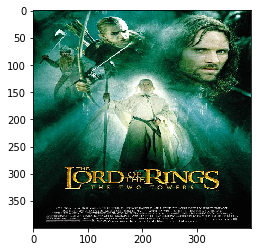

In [0]:
plt.imshow(X[2])

In [0]:
df.columns

Index(['tid', 'title', 'url', 'image_url', 'year', 'action', 'scifi', 'drama',
       'romance'],
      dtype='object')

In [0]:
print(df['action'][2])
print(df['scifi'][2])
print(df['drama'][2])
print(df['romance'][2])

True
False
False
False


In [0]:
y = np.array(df.drop(['tid', 'title', 'url', 'image_url', 'year'],axis=1))
y.shape

(2436, 4)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 93, 93, 64)       

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=64)




Train on 2192 samples, validate on 244 samples
Epoch 1/20





2192/2192 [==============================] - 412s 188ms/step - loss: 0.6037 - acc: 0.7044 - val_loss: 0.5566 - val_acc: 0.7695
Epoch 2/20
2192/2192 [==============================] - 408s 186ms/step - loss: 0.5350 - acc: 0.7716 - val_loss: 0.5254 - val_acc: 0.7695
Epoch 3/20
2192/2192 [==============================] - 407s 185ms/step - loss: 0.5283 - acc: 0.7803 - val_loss: 0.5223 - val_acc: 0.7695
Epoch 4/20
2192/2192 [==============================] - 407s 186ms/step - loss: 0.5237 - acc: 0.7823 - val_loss: 0.5212 - val_acc: 0.7695
Epoch 5/20
2192/2192 [==============================] - 407s 186ms/step - loss: 0.5178 - acc: 0.7858 - val_loss: 0.5213 - val_acc: 0.7695
Epoch 6/20
2192/2192 [==============================] - 408s 186ms/step - loss: 0.5129 - acc: 0.7864 - val_loss: 0.5178 - val_acc: 0.7695
Epoch 7/20
2192/2192 [==============================] - 410s 187ms/step - loss: 0.5049 - acc: 0.7863 - val_loss: 0.52

In [23]:
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test, batch_size=64)
print('test loss, test acc:', results)

#prediction = model.predict(X_test)
#y_pred = (prediction > 0.5)

y_pred = model.predict(X_test)


# Evaluate on test data
244/244 [==============================] - 10s 40ms/step
test loss, test acc: [0.5209181250118818, 0.7715163993053749]


In [42]:
from sklearn.metrics import f1_score , confusion_matrix , precision_score , recall_score
import warnings
warnings.filterwarnings('always')
#warnings.filterwarnings('ignore')
y_pred = y_pred > 0.5
print(1*y_pred)
print(1*y_test)
print("f1 score: ".format(f1_score(1*y_test[0:10], 1*y_pred[0:10],average='weighted',labels=np.unique(y_pred))))

[[0 0 1 0]
 [0 0 1 0]
 [1 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]
 [1 0 1 0]
 [1 0 0 0]
 [1 0 1 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 1 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]
 [1 0 1 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [1 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 1 0]
 [1 0 1 0]
 [0 0 1 0]
 [1 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
# 2. Save Keras Model or weights on google drive

# create on Colab directory
model.save('model.h5')    
model_file = drive.CreateFile({'title' : 'model.h5'})
model_file.SetContentFile('model.h5')
model_file.Upload()

# download to google drive
drive.CreateFile({'id': model_file.get('id')})

OSError: ignored

In [0]:
model.save_weights('model_weights.h5')
weights_file = drive.CreateFile({'title' : 'model_weights.h5'})
weights_file.SetContentFile('model_weights.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

OSError: ignored

In [0]:
# 3. reload weights from google drive into the model

# use (get shareable link) to get file id
last_weight_file = drive.CreateFile({'id': '1sj...'}) 
last_weight_file.GetContentFile('last_weights.mat')
model.load_weights('last_weights.mat')

In [0]:
model_json = model.to_json()
with open("drive/My Drive/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("drive/My Drive/model_weights.h5")
print("Saved model to drive")

FileNotFoundError: ignored

In [0]:
!pwd

/content/drive/My Drive/MOVIE POSTER CHALLENGE


In [0]:
% cd ..

/content/drive


In [0]:
% cd My\ Drive

/content/drive/My Drive
